# Assignment Target

##  Introduction

How I approached the assignement

I planned the following steps:

1. Quick exploration of dataset (using description in the assignment and python comnmand line)
2. Prepare environment
3. Import & explore dataset
4. Create Ideas
5. Work out Ideas 
6. Refinement
7. Solution summary 


Below you can follow the train of thought. If you're just interested in the solution summary. You can skip to section 7.   


After section 7 I also added:
* an evaluation 
* and a references section

## 1. Quick exploration of dataset

I did this based on the assignment and with the python command line.

## 2. Prepare environment

I wanted to have a clean environment to work in with a Jupyter Notebook. 

I briefly checked out an anaconda docker, anaconda installation and decided that these were bloated or took too much time. 

I decided to use a venv instead where I installed miniconda and required libraries. Instructions in seperate notebook: http://localhost:8888/notebooks/GIT/JupyterNotebooks/Environment.ipynb

## 3. Import & explore dataset

In [1]:
import pickle

In [2]:
# display current directory
import os
print(os.getcwd())

/Users/bartjonk/GIT/JupyterNotebooks


In [3]:
#Load dataset
X_train, y_train = pickle.load(open("Target_Data/train_X_y.p", "rb"))

### Exploration of dataset

some initial dataset investigations 

In [6]:
# Manage imports for investigating data
import sklearn as sk
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

In [7]:
# start investigating dataset
len(X_train)  

1857

In [8]:
X_train[0].shape[0]


47

In [9]:
sample_sizes = []
s=0
while s < len(X_train):
    #print(X_train[s].shape[0])
    sample_sizes.append(X_train[s].shape[0])
    s=s+1
#sample_sizes

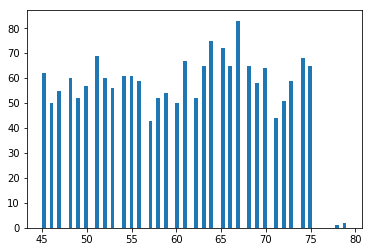

In [10]:

plt.hist(sample_sizes, bins=80)
plt.show()


In [11]:
print (max(sample_sizes), min(sample_sizes))




79 45


In [12]:
X_train[0]  # look at one array

array([[-0.081722,  9.9565  , -0.23155 ],
       [ 1.2667  ,  8.6898  , -0.65378 ],
       [ 0.38137 ,  9.7249  , -0.88532 ],
       [-0.65378 , 10.379   , -1.076   ],
       [-0.27241 ,  8.8124  ,  0.23155 ],
       [ 0.65378 ,  7.0145  ,  0.92618 ],
       [ 0.61292 ,  6.8238  ,  0.19068 ],
       [-0.14982 ,  7.5048  , -0.34051 ],
       [-0.14982 ,  8.0496  , -0.081722],
       [ 0.42223 ,  8.1177  ,  0.53119 ],
       [ 0.27241 ,  8.3084  ,  0.8036  ],
       [-0.38137 ,  8.7715  ,  0.95342 ],
       [-0.46309 ,  9.9973  ,  0.8036  ],
       [ 0.040861, 11.795   ,  0.8036  ],
       [-0.29965 , 12.531   ,  1.9477  ],
       [-1.5255  , 12.871   ,  2.7649  ],
       [-0.61292 , 14.288   ,  1.6481  ],
       [ 0.92618 , 12.599   ,  0.14982 ],
       [ 2.3427  ,  9.6568  , -0.29965 ],
       [ 4.1406  ,  8.3084  , -0.76274 ],
       [ 5.598   ,  8.3084  , -0.91256 ],
       [ 4.4811  ,  9.003   , -0.23155 ],
       [ 0.53119 ,  8.9213  ,  1.1441  ],
       [-1.757   ,  7.927   ,  1.9

In [13]:
#select one tuple
X_train[0][0]

array([-0.081722,  9.9565  , -0.23155 ])

### plot a few wandelfragmenten

<function matplotlib.pyplot.show(*args, **kw)>

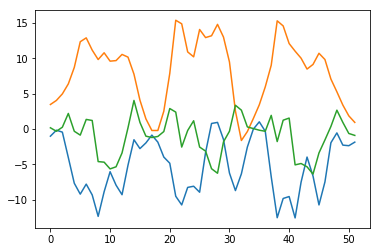

In [14]:
#plot one wnadelfragment
plt.plot(X_train[8])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

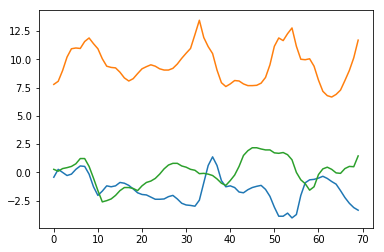

In [15]:
plt.plot(X_train[210])
plt.show



In [16]:
y_train[210]


1.0

<function matplotlib.pyplot.show(*args, **kw)>

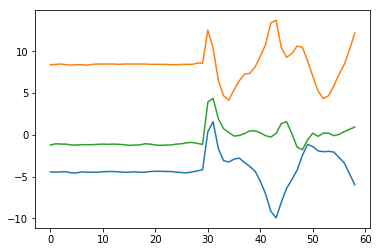

In [17]:
plt.plot(X_train[1200])
plt.show

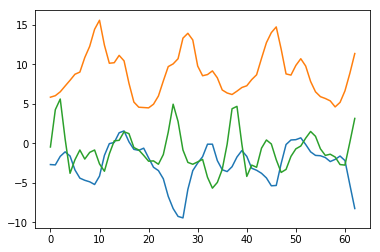

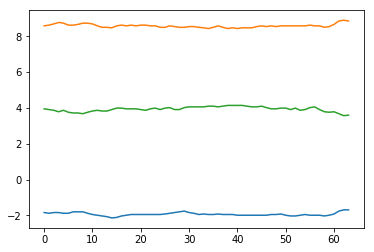

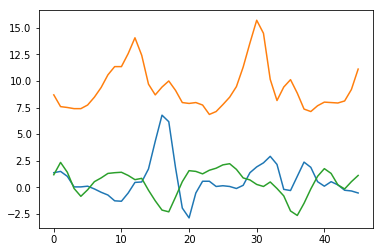

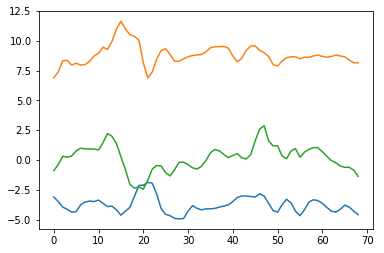

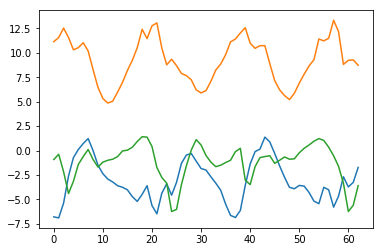

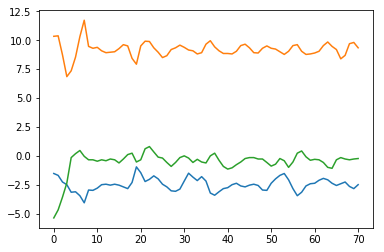

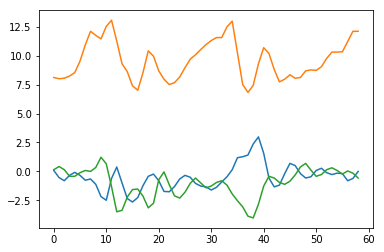

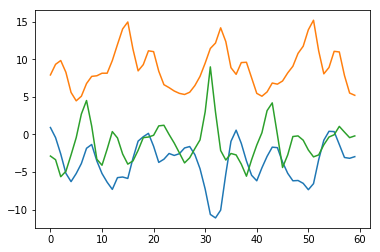

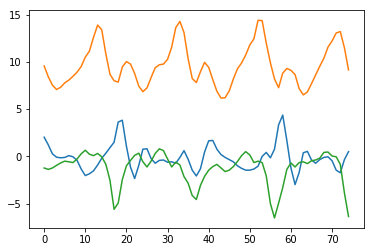

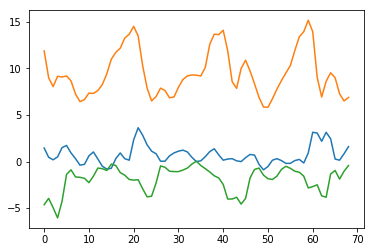

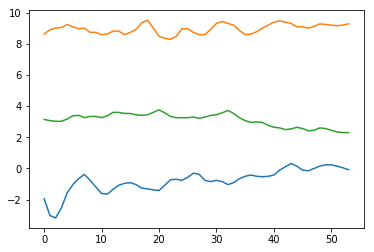

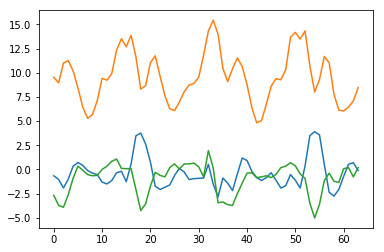

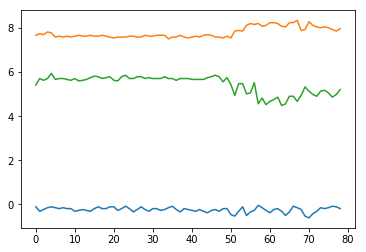

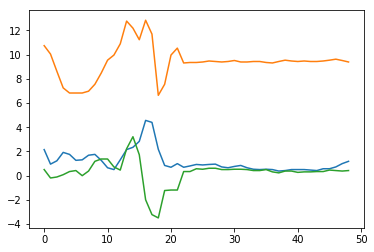

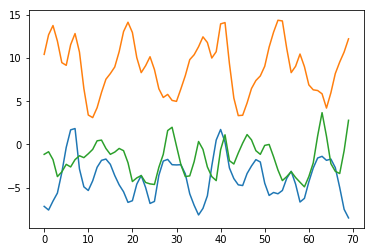

In [18]:
i = 1600
j = 1615
while i < j:
    plt.figure()
    plt.plot(X_train[i])
    plt.show
    i=i+1

### A bit of data profiling 

In [19]:
#look into minmax values
from  scipy import stats
stats.describe(X_train[0])[1][0]



array([-1.757 ,  6.4424, -2.1793])

In [20]:
minima = []
maxima = []
s=0
while s < len(X_train):
    #print(X_train[s].shape[0])
    minima.append(stats.describe(X_train[s])[1][0])
    maxima.append(stats.describe(X_train[s])[1][1])
    s=s+1


In [21]:
stats.describe(minima)

DescribeResult(nobs=1857, minmax=(array([-19.572, -10.924, -13.525]), array([5.2166, 9.5342, 8.7306])), mean=array([-5.13854628,  5.04688453, -2.89100407]), variance=array([12.72458882,  5.53759708, 11.02465453]), skewness=array([-0.67465857, -1.47040655,  1.21878458]), kurtosis=array([-0.26485406,  5.18359848,  1.6904844 ]))

In [22]:
stats.describe(maxima)

DescribeResult(nobs=1857, minmax=(array([-7.8589 ,  0.50395, -4.0997 ]), array([19.314, 19.572, 19.341])), mean=array([ 2.04792353, 13.35291026,  3.8556561 ]), variance=array([ 7.40036762,  7.48570964, 10.64913033]), skewness=array([ 0.88123865, -1.1629938 ,  1.56446813]), kurtosis=array([2.80569581, 1.66542312, 2.82138345]))

## 4. Create Ideas

Follwoing from the above I had 3 Ideas which I wanted to work out: 


#### (1)
To check if my idea works I need to **split the training set** in a training set and a test_set... (I don't have an y_test set, thus I need a way to verify if my ML works another way...)

#### (2)
I think it should be possible find nearest neighbours while **matching sliding windows** of 20 measurements (20 based on visual inspection)(interesting to see if the direction (difference between two measurements) will help as well). Other idea is to use CNN (but no experience and a hunch that K-NN will work as well). 

#### (3)
I should **try different algorithms, with different parameters**, e.g. to find the _optimum windows size_ (ref. : trying different ML types : https://www.kaggle.com/urmysun/run-or-walk-models-comparison )




## 5. Work out Ideas 

### 5.1 Idea (1): Split training set

Splitting the training set in a supervised learning set and a test-set with known answers will allow me to identify the efectiveness of various algorithms and settings. 

Used references: 
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [76]:
# split training set 
#
# I modyfied the prefix from X_ to Xs_ to indicate I'm working with a smaller set
#
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_train, y_train)

#check
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test), np.unique(ys_train), type(ys_test)

(1392,
 1392,
 465,
 465,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 list)

In [24]:
## visual check
ys_test[0:3]

[19.0, 5.0, 5.0]

### 5.2 Work out idea (2): Sliding windows

- Feature extraction
  - generating sliding windows
- data preparation
  - Did some work on scratchpad notebook to experiment with correct input format 
        "Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]" http://www.scipy-lectures.org/packages/scikit-learn/index.htmldataformaat 
  - Required format is thus : 
      xyz1, xyz2, xyz3, target
      xyz2, xyz3, xyz4, target
      (or actually)
      x1, y1, z1, x2, y2, z2, x3, y3, z3, target
      x2, y2, z2, x3, y3, z3, x4, y4, z4, target
      
      where target can be split-off again for y_test with equal lenght as X_test


In [25]:
#High level algorithm design (as preparation for building it)


# algoritme
# 1. stap through list Xs_train and ys_train till len(Xs_train) #numberOfFragments
# 2. for each listitem, determine number of samples (numSamples) in listitem
# 3. Make new list with samples [0:9], [1:10], ...,  [../numSamples], and save the target with them
# 4. Create Matrices and vectors as required by k-NN 
# nb. we will parametrise the lenght of the sliding window, in order to experiment with the ML

In [26]:
def create_sliding_window_dataframe(X_t, y_t, slidingWindowLength):  # slidingWindowLength starts at 0
    #
    # Returns : 
    #   - dataframe with on each row XYZ coordinates
    #   - list of lenght(Dataframe) with the targetnumber that the slidingwindow belongs to
    #   - list of lenght(Dataframe) with integer to identify the wandelfragment (starting at 0)
    #
    #   The number of XYZ coordinates in row is equal to slidingWindowLength
    #   last column equals to subject from y_target.
    #
    #   Example for slidingWindowLength = 2
    #
    #  	    X0	        Y0	     Z0	        X1	    Y1	    Z1          yt    wf_id
    #   0	-0.081722	9.9565	-0.231550	1.26670	8.6898	-0.653780   18    0
    #   1	1.266700	8.6898	-0.653780	0.38137	9.7249	-0.885320   18    0
    #
    #
    #

    # initialize
    result = pd.DataFrame()
    numberOfFragments = len(X_t)

    i = 0  # counter

    while (i < numberOfFragments):  # loop over wandelfragmenten
        # determine length (number of measurements) for the fragment
        numberOfMeasurements = len(X_t[i])
        w = 0
        window = pd.DataFrame()
        while (w < slidingWindowLength):
            df = pd.DataFrame({'X' + str(w): X_t[i][w:, 0],
                               'Y' + str(w): X_t[i][w:, 1],
                               'Z' + str(w): X_t[i][w:, 2]})
            window = pd.concat([window, df], axis=1)  # add df to the right of window
            w = w + 1  # next df
        # all windows added to the right of the table

        # dropping windows with NA values
        window.dropna(inplace=True)

        # add target to table
        target_index = np.arange(len(window))
        target_values = [y_t[i]] * len(window)
        target = pd.Series(target_values, target_index, dtype=int, name='yT')

        window = pd.concat([window, target], axis=1)  # add target to the right of table

        # add wandelfragment id to DataFrame
        wf_index = np.arange(len(window))
        wf_values = [i] * len(window)
        wf_series = pd.Series(wf_values, wf_index, dtype=int, name='wf_id')

        window = pd.concat([window, wf_series], axis=1)

        # append table to result
        result = result.append(window)

        # sliding windows created over all measurements of fragment, next fragment
        i = i + 1

        # print progress indicator
        if i % 50 == True:
            print(i-1, end=', ')
        elif i % 10: 
            print('.', end='')

    return result.drop(result.columns[[-2,-1]], axis=1), list(result[result.columns[-2]]), list(result[result.columns[-1]])


#### 5.2.1 Test create_sliding_window_dataframe on extra-small dataset 

I did some testing of the algorithm above with an extra small data-set. 

(Reading is section is probably not interesting but you can maybe use the code...)

I also tested making predictions and putting them in a Dataframe, together with actual target (y_test) and the number of the wandelfragment (which allows collapsing the sliding-windows to wandelfragments again).

In [ ]:
#Run this for Quick test on extra smal test set
windowsize = 2
small_Xs_train = Xs_train[1:10]
small_ys_train =  ys_train[1:10]
small_Xs_test =  Xs_test[1:4]
small_ys_test = ys_test[1:4]

# The algorithm is called with the xtra-samll-set, but I did not change the varianle names to which I assigned
# the results to in order to make it easier to copy later....  
Xws_train, yws_train, train_fragment_id = create_sliding_window_dataframe(small_Xs_train, small_ys_train, windowsize)
Xws_test, yws_test, test_fragment_id = create_sliding_window_dataframe(small_Xs_test, small_ys_test, windowsize)


In [ ]:
small_Xs_test

In [ ]:
Xws_train.info()

In [ ]:
len(Xws_train), len(yws_train), len(train_fragment_id), len(Xws_test), len(yws_test), len(test_fragment_id)


In [ ]:
np.unique(train_fragment_id), np.unique(test_fragment_id)

In [ ]:
#Now fit model with small test set
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=n)
kn.fit(Xws_train, yws_train)

print("n_neighbors=", n, ' & wsize ', wsize)
print("The training accuracy for K-Neighbors is ", kn.score(Xws_train, yws_train))
print("The testing accuracy for K-Neighbors is ", kn.score(Xws_test, yws_test))
print() 

In [ ]:
## collect predcitions
wp = kn.predict(Xws_test) #type = nparray

#convert wp, yws_test and test_fragment_id to pd.Series, and put in df
df = pd.concat([pd.Series(wp.tolist(), name='predict')
               , pd.Series(yws_test, name='y')
               , pd.Series(test_fragment_id, name='tf_i')]
              , axis=1)

np.unique(test_fragment_id)

### 5.3 work out idea (3) use create_sliding_window() function, and test various alternative algorithms

The slidingwindow size was chosen after trying out multiple values by looping over various algorithms (my hunch that k-NN would suffice was correct)

#### 5.3.1 create sliding widows

In [27]:
#First use Xs_train, ys_train, Xs_test, ys_test to create sliding windows
#
# I modyfied the prefix from Xs_ to Xws_ to indicate I'm working with a windowed set
#

wsize = 21 #slidingWindowLength
Xws_train, yws_train, train_fragment_id = create_sliding_window_dataframe(Xs_train, ys_train, wsize)
Xws_test, yws_test, test_fragment_id  = create_sliding_window_dataframe(Xs_test, ys_test, wsize)

0, ............................................50, ............................................100, ............................................150, ............................................200, ............................................250, ............................................300, ............................................350, ............................................400, ............................................450, ............................................500, ............................................550, ............................................600, ............................................650, ............................................700, ............................................750, ............................................800, ............................................850, ............................................900, ............................................950, ............................................1000, .................

In [28]:
# Do some visual inspections of the results
len(Xws_train), len(yws_train), len(train_fragment_id), len(Xws_test), len(yws_test), len(test_fragment_id)



(55906, 55906, 55906, 19005, 19005, 19005)

In [29]:
# Do some visual inspections of the results
Xws_train.head(4)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z17,X18,Y18,Z18,X19,Y19,Z19,X20,Y20,Z20
0,6.9736,5.1349,-1.94770,5.7478,5.0940,-0.69464,3.5685,5.3664,0.38137,2.4925,...,-2.45170,3.6366,9.8884,-2.07030,4.7535,8.7306,-1.52550,4.4811,7.2733,-0.72188
1,5.7478,5.0940,-0.69464,3.5685,5.3664,0.38137,2.4925,5.4073,0.53119,1.6481,...,-2.07030,4.7535,8.7306,-1.52550,4.4811,7.2733,-0.72188,3.2961,5.4754,0.50395
2,3.5685,5.3664,0.38137,2.4925,5.4073,0.53119,1.6481,5.7478,0.34051,1.3348,...,-1.52550,4.4811,7.2733,-0.72188,3.2961,5.4754,0.50395,2.0703,4.1406,1.64810
3,2.4925,5.4073,0.53119,1.6481,5.7478,0.34051,1.3348,6.5514,0.42223,1.6481,...,-0.72188,3.2961,5.4754,0.50395,2.0703,4.1406,1.64810,1.7979,3.8682,2.11120


In [30]:
# Do some visual inspections of the results
Xws_test.head(4)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z17,X18,Y18,Z18,X19,Y19,Z19,X20,Y20,Z20
0,1.4165,8.3084,-0.65378,2.1112,8.6217,-0.69464,2.0294,8.7715,-0.80360,1.33480,...,-3.9499,2.64230,9.7249,-3.1463,2.07030,11.6450,-2.7241,1.14410,11.1140,-1.9477
1,2.1112,8.6217,-0.69464,2.0294,8.7715,-0.80360,1.3348,8.8124,-0.72188,1.18500,...,-3.1463,2.07030,11.6450,-2.7241,1.14410,11.1140,-1.9477,0.19068,9.3844,-1.2667
2,2.0294,8.7715,-0.80360,1.3348,8.8124,-0.72188,1.1850,8.5400,-0.57205,1.49820,...,-2.7241,1.14410,11.1140,-1.9477,0.19068,9.3844,-1.2667,-0.72188,7.3141,-1.4165
3,1.3348,8.8124,-0.72188,1.1850,8.5400,-0.57205,1.4982,8.5400,-0.57205,0.88532,...,-1.9477,0.19068,9.3844,-1.2667,-0.72188,7.3141,-1.4165,-0.10896,7.5865,-1.4165


#### 5.3.2 Test-loop on windowed set
I tried out various algorithes and settings to narrow down the best candidates, in a loop *_like the one below_*. 

Other algorithms tried are on a scratch-pad.

In [ ]:
# Example code
# Model: K-Neighbors, wsize 20-26
from sklearn.neighbors import KNeighborsClassifier

n = 1
wsize = 20
while wsize <= 25:
    
    print("n_neighbors=", n, ' & wsize ', wsize)
    
    Xws_train, yws_train, wf_train_id = create_sliding_window_dataframe(Xs_train, ys_train, wsize)
    print()
    Xws_test, yws_test, wf_test_id  = create_sliding_window_dataframe(Xs_test, ys_test, wsize)
    print()
    
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(Xws_train, yws_train)
    
    print("n_neighbors=", n, ' & wsize ', wsize)
    print("The training accuracy for K-Neighbors is ", kn.score(Xws_train, yws_train))
    print("The testing accuracy for K-Neighbors is ", kn.score(Xws_test, yws_test))
    print() 

    wsize = wsize + 1

Output:
```
n_neighbors= 1  & wsize  20
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  20
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.8033672833090834

n_neighbors= 1  & wsize  21
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  21
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.8043559294957133

n_neighbors= 1  & wsize  22
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  22
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.805449382985694

n_neighbors= 1  & wsize  23
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  23
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.8058154518460418

n_neighbors= 1  & wsize  24
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  24
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.8062586286240221

n_neighbors= 1  & wsize  25
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951, 1001, 1051, 1101, 1151, 1201, 1251, 1301, 1351, 
1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 
n_neighbors= 1  & wsize  25
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.806371534960695
```

## 6. Refinement
In this section I tried to look into the test/training-set in more detail, to find possible optimisations.

In [32]:
#Fit model
from sklearn.neighbors import KNeighborsClassifier

n=1
kn = KNeighborsClassifier(n_neighbors=n)
kn.fit(Xws_train, yws_train)

print("n_neighbors=", n, ' & wsize ', wsize)
print("The training accuracy for K-Neighbors is ", kn.score(Xws_train, yws_train))
print("The testing accuracy for K-Neighbors is ", kn.score(Xws_test, yws_test))
print() 

n_neighbors= 1  & wsize  21
The training accuracy for K-Neighbors is  1.0
The testing accuracy for K-Neighbors is  0.8123125493291239



In [ ]:
# first collect all window-predictions
window_prediction = kn.predict(Xws_test) #type = nparray

# and put them into a df, note we first need to  convert wp, yws_test and test_fragment_id to pd.Series
R = pd.concat([pd.Series(window_prediction.tolist(), name='predict')
               , pd.Series(yws_test, name='y')
               , pd.Series(test_fragment_id, name='i')]
              , axis=1)

In [34]:
# investigate predictions versus y_test of all winwdows of one wandelfragment 
R.head(4)
print(R[R.i == 8])


     predict   y  i
351        8  16  8
352       19  16  8
353        5  16  8
354        5  16  8
355       12  16  8
356        8  16  8
357       11  16  8
358        1  16  8
359        1  16  8
360        1  16  8
361       16  16  8
362       16  16  8
363       16  16  8
364       16  16  8
365       19  16  8
366       19  16  8
367       19  16  8
368       19  16  8
369       19  16  8
370       19  16  8
371       19  16  8
372       19  16  8
373       19  16  8
374       19  16  8
375       19  16  8
376       19  16  8
377        1  16  8
378       19  16  8
379       19  16  8
380       19  16  8
381       15  16  8
382       19  16  8
383       19  16  8
384       19  16  8
385       19  16  8
386       19  16  8
387       19  16  8
388       19  16  8


In [ ]:
plt.plot(R[R.i == 8])
plt.show()


For the definitive score we need to select the most occurring prediction for a set of windows that belong to one wandelfragment 



In [266]:
#check the number of predtions for each wandelfragment
R.groupby(['i','predict']).count()


y
i   predict    
0   17       35
1   19       37
2   17       53
3   9        45
4   1         5
    7         2
    8         4
    16       20
    20        1
5   19       46
6   16       39
7   7        40
8   6         4
    11        9
    16        4
    17        7
    19        3
9   4         7
    16       32
10  7        30
    9         2
    17        3
11  16       31
12  0         2
    3        20
    9         2
    16        1
    17        3
    21        5
13  1         2
...          ..
449 11       10
    16        1
    17        3
450 11       52
451 13       32
452 16       30
453 17        7
    18       25
454 16       31
455 16        9
    21       39
456 11       44
457 10       28
458 19       54
459 7         9
    9         1
    12        2
    13        1
    17       30
460 19       53
461 3        41
462 5        47
463 3         1
    5         1
    6        10
    13        1
    17       28
    19        2
    21        1
464 14       25

[955 rows x 1 columns]

In [267]:
#Add this count as new column
R['count'] = R.groupby(['i','predict'])['y'].transform('count')

In [273]:
# sort Resultset on i, count
R.sort_values(by=['i', 'count'], ascending=[True, False], inplace=True)


In [285]:
#now select the 'predict' column of first record for each i
list(R.groupby('i').head(1)['predict'])


[17,
 19,
 17,
 9,
 16,
 19,
 16,
 7,
 11,
 16,
 7,
 16,
 3,
 2,
 21,
 21,
 10,
 19,
 21,
 21,
 16,
 17,
 17,
 13,
 12,
 21,
 17,
 3,
 10,
 9,
 21,
 19,
 21,
 12,
 16,
 5,
 17,
 13,
 8,
 13,
 16,
 16,
 3,
 16,
 16,
 20,
 19,
 13,
 19,
 21,
 17,
 16,
 19,
 12,
 16,
 8,
 19,
 17,
 8,
 5,
 0,
 16,
 17,
 16,
 6,
 16,
 12,
 17,
 16,
 11,
 17,
 19,
 21,
 16,
 17,
 14,
 9,
 12,
 12,
 19,
 5,
 17,
 16,
 13,
 1,
 17,
 16,
 13,
 4,
 17,
 13,
 13,
 3,
 12,
 16,
 8,
 3,
 16,
 21,
 17,
 4,
 16,
 16,
 16,
 0,
 19,
 16,
 12,
 11,
 17,
 12,
 13,
 17,
 19,
 13,
 3,
 19,
 10,
 16,
 17,
 17,
 11,
 16,
 3,
 8,
 19,
 13,
 17,
 1,
 7,
 21,
 17,
 19,
 15,
 16,
 14,
 13,
 0,
 16,
 5,
 17,
 16,
 1,
 3,
 9,
 10,
 7,
 6,
 6,
 14,
 15,
 13,
 10,
 8,
 17,
 19,
 19,
 17,
 11,
 12,
 17,
 11,
 5,
 21,
 16,
 5,
 21,
 3,
 19,
 1,
 17,
 19,
 21,
 16,
 12,
 19,
 21,
 5,
 12,
 0,
 12,
 8,
 17,
 8,
 20,
 10,
 14,
 3,
 21,
 3,
 17,
 16,
 20,
 19,
 13,
 17,
 5,
 21,
 6,
 3,
 8,
 11,
 16,
 13,
 14,
 21,
 13,
 13,
 3,
 16,
 17

In [300]:
#accuracy
total = R.groupby('i').head(1).shape[0] # total
wrong = R.groupby('i').head(1).loc[R.predict != R.y].shape[0] # errors
ok = R.groupby('i').head(1).loc[R.predict == R.y].shape[0]
accuracy = ok / total

total, wrong, ok, accuracy 

(465, 76, 389, 0.8365591397849462)

# 7.  Create Final Resultset

In the chapters above I used my own training/test set created from the given X_training. 

For the final resultset I have to train once more with full training set! 

In [1]:
# (redo) imports
import pickle
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier



In [2]:
#(re-)Load dataset
X_train, y_train = pickle.load(open("Target_Data/train_X_y.p", "rb"))

#Load test-set
X_test = pickle.load(open("Target_Data/test_X.p", "rb"))

In [3]:
len(X_train)

1857

In [4]:
def create_sliding_window_dataframe(X_t, y_t, slidingWindowLength):  # slidingWindowLength starts at 0
    #
    # Returns : 
    #   - dataframe with on each row XYZ coordinates
    #   - list of lenght(Dataframe) with the targetnumber that the slidingwindow belongs to
    #   - list of lenght(Dataframe) with integer to identify the wandelfragment (starting at 0)
    #
    #   The number of XYZ coordinates in row is equal to slidingWindowLength
    #   last column equals to subject from y_target.
    #
    #   Example for slidingWindowLength = 2
    #
    #  	    X0	        Y0	     Z0	        X1	    Y1	    Z1          yt    wf_id
    #   0	-0.081722	9.9565	-0.231550	1.26670	8.6898	-0.653780   18    0
    #   1	1.266700	8.6898	-0.653780	0.38137	9.7249	-0.885320   18    0
    #
    #
    #

    # initialize
    result = pd.DataFrame()
    numberOfFragments = len(X_t)

    i = 0  # counter

    while (i < numberOfFragments):  # loop over wandelfragmenten
        # determine length (number of measurements) for the fragment
        numberOfMeasurements = len(X_t[i])
        w = 0
        window = pd.DataFrame()
        while (w < slidingWindowLength):
            df = pd.DataFrame({'X' + str(w): X_t[i][w:, 0],
                               'Y' + str(w): X_t[i][w:, 1],
                               'Z' + str(w): X_t[i][w:, 2]})
            window = pd.concat([window, df], axis=1)  # add df to the right of window
            w = w + 1  # next df
        # all windows added to the right of the table

        # dropping windows with NA values
        window.dropna(inplace=True)

        # add target to table
        target_index = np.arange(len(window))
        target_values = [y_t[i]] * len(window)
        target = pd.Series(target_values, target_index, dtype=int, name='yT')

        window = pd.concat([window, target], axis=1)  # add target to the right of table

        # add wandelfragment id to DataFrame
        wf_index = np.arange(len(window))
        wf_values = [i] * len(window)
        wf_series = pd.Series(wf_values, wf_index, dtype=int, name='wf_id')

        window = pd.concat([window, wf_series], axis=1)

        # append table to result
        result = result.append(window)

        # sliding windows created over all measurements of fragment, next fragment
        i = i + 1

        # print progress indicator
        if i % 50 == True:
            print(i-1, end=', ')
        elif i % 10: 
            print('.', end='')

    return result.drop(result.columns[[-2,-1]], axis=1), list(result[result.columns[-2]]), list(result[result.columns[-1]])


In [5]:
#sclice trainingset, testset into windows
Xw_train, yw_train, train_fragment_id = create_sliding_window_dataframe(X_train, y_train, 22)


0, ............................................50, ............................................100, ............................................150, ............................................200, ............................................250, ............................................300, ............................................350, ............................................400, ............................................450, ............................................500, ............................................550, ............................................600, ............................................650, ............................................700, ............................................750, ............................................800, ............................................850, ............................................900, ............................................950, ............................................1000, .................

In [6]:
#slice testset into windows 
#  y_test is unknown, I use a dummy value for the second parameter
Xw_test, yw_test, test_fragment_id = create_sliding_window_dataframe(X_test, [0] * len(X_test), 22)



0, ............................................50, ............................................100, ............................................150, ............................................200, ............................................250, ............................................300, ............................................350, ............................................400, ............................................450, ............................................500, ............................................550, ............................................600, .......................

In [11]:
#visual inspectoin of the results
len(Xw_test), len(yw_test), len(test_fragment_id), len(Xw_train)

(24135, 24135, 24135, 73054)

In [10]:
# Fit model with full training set (sliced into windows)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(Xw_train, yw_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
# Collect all window-predictions of the (sliding window-sliced) test set
window_prediction = kn.predict(Xw_test) #type = nparray

# Put predictions into a dataframe (note we first need to convert wp, yw_test and test_fragment_id to pd.Series)
R = pd.concat([pd.Series(window_prediction.tolist(), name='predict')
               , pd.Series(yw_test, name='y')
               , pd.Series(test_fragment_id, name='i')]
              , axis=1)

In [14]:
#Add the count of the predictions as new column
R['count'] = R.groupby(['i','predict'])['y'].transform('count')

In [16]:
# sort Resultset on i, count
R.sort_values(by=['i', 'count'], ascending=[True, False], inplace=True)


In [77]:
# Visual inspection : check the number of predictions for each wandelfragment
R.groupby(['i','predict']).count()

y  count
i   predict           
0   17       49     49
1   17       28     28
2   11       29     29
3   5         1      1
    8        24     24
    11       10     10
    15        2      2
    16        3      3
    19       11     11
4   17       33     33
5   19       31     31
6   9        36     36
7   5        48     48
8   19       37     37
9   8         7      7
    16        2      2
    21       15     15
10  13       37     37
11  1        18     18
    2        15     15
12  3        26     26
13  5        45     45
14  19       52     52
15  4        28     28
    8         2      2
    16        1      1
    18        2      2
16  0        15     15
    16        6      6
    17       14     14
...          ..    ...
613 5        48     48
614 16        1      1
    17       40     40
    20       10     10
615 3         1      1
    7         2      2
    14        1      1
    16       47     47
616 11       37     37
617 17       25     25
618 7        22     22
    9         1      1
    10        3      3
619 21       47     47
620 5        42     42
    6         1      1
    15        4      4
    19        3      3
621 3        47     47
622 2         4      4
    6         1      1
    13       14     14
    14        2      2
    17        6      6
    19        8      8
623 13       27     27
624 9         1      1
    17       41     41
    21        1      1
625 6        34     34

[1251 rows x 2 columns]

In [19]:
#now select the 'predict' column of first record for each i
finalresultlist = list(R.groupby('i').head(1)['predict'])

In [23]:
len(X_test), len(finalresultlist)

(626, 626)

In [24]:
finalresultlist

[17,
 17,
 11,
 8,
 17,
 19,
 9,
 5,
 19,
 21,
 13,
 1,
 3,
 5,
 19,
 4,
 0,
 16,
 16,
 13,
 8,
 8,
 3,
 21,
 17,
 6,
 13,
 20,
 21,
 13,
 0,
 17,
 10,
 13,
 8,
 17,
 16,
 21,
 10,
 21,
 16,
 21,
 5,
 21,
 16,
 11,
 13,
 16,
 5,
 16,
 19,
 13,
 0,
 13,
 19,
 14,
 8,
 21,
 11,
 16,
 1,
 17,
 10,
 21,
 21,
 21,
 21,
 10,
 19,
 13,
 13,
 13,
 5,
 8,
 19,
 12,
 21,
 3,
 17,
 19,
 16,
 3,
 16,
 17,
 11,
 21,
 17,
 19,
 9,
 16,
 13,
 14,
 20,
 16,
 6,
 11,
 13,
 13,
 16,
 13,
 11,
 18,
 16,
 13,
 12,
 5,
 16,
 17,
 16,
 12,
 3,
 19,
 4,
 16,
 20,
 7,
 21,
 14,
 20,
 11,
 8,
 16,
 12,
 21,
 10,
 16,
 17,
 19,
 6,
 7,
 17,
 16,
 17,
 19,
 9,
 14,
 17,
 21,
 13,
 19,
 10,
 21,
 3,
 4,
 19,
 3,
 0,
 16,
 12,
 19,
 10,
 5,
 19,
 16,
 5,
 1,
 19,
 21,
 21,
 17,
 16,
 11,
 8,
 16,
 17,
 6,
 0,
 16,
 12,
 16,
 21,
 13,
 5,
 13,
 14,
 12,
 17,
 19,
 12,
 19,
 14,
 8,
 4,
 20,
 16,
 3,
 0,
 16,
 11,
 5,
 19,
 3,
 17,
 17,
 1,
 0,
 21,
 16,
 16,
 16,
 17,
 20,
 19,
 10,
 7,
 5,
 10,
 13,
 16,
 0,
 17,


In [78]:
import json
json.dump(list(finalresultlist), open("y_pred.json", "w+"))

# Evaluation & learnings

* I had great fun with the assignment
* I have no clue and am wondering if the accuracy reached is anything near what could be achieved (my goal was reaching over 90%-95%...). I could easily have spend a lot of time trying to reach higher and higher accuracy (refinement)...
* I know there's more theory behind choosing the correct parameters for certain algothms (e.g. train/test size, n_neighbours etc.) but chose to just try values.... I'm really curious to learn more about these (!) 
* Same thing applies to trying out Neural Networks ... dying to learn more about it, but... decided not to get lost in it and stay focuessed on the assignment (which was basically to show programming skills and reasoning)
* I looped over various algorithms and algorithm sessions, but had chosen wrongly to use print() statements for the results. Next time I will store them in an array to create nice graphs out of the results!


# Other resources used 

Just as a notebook, not to lose them. 'Use' is a heavy term. Some of just briefly read.
* https://www.datacamp.com/community/tutorials/machine-learning-python
* http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* https://towardsdatascience.com/run-or-walk-detecting-user-activity-with-machine-learning-and-core-ml-part-1-9658c0dcdd90
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3244008/
* https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb

> "...to summarize, the expected layout of features and target values is visualized in the following diagram:

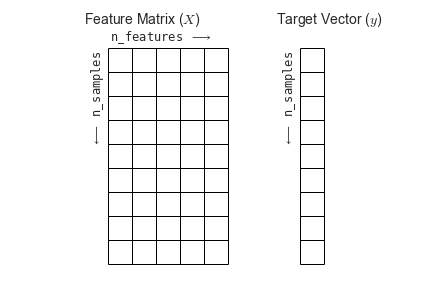